In [8]:
import rasterio
import numpy as np
import geopandas as gpd
from rasterio.features import rasterize
from rasterio.transform import from_origin
import numpy as np
import shutil


In [2]:
landcover_path = "../data/mridge_lcm_10m.tif"

with rasterio.open(landcover_path) as src:
    landcover_data = src.read(1)
    unique_values = np.unique(landcover_data)
    profile = src.profile

print("Unique land cover values:", unique_values)
print("Raster profile:\n", profile)


Unique land cover values: [0]
Raster profile:
 {'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 2100, 'height': 2100, 'count': 26, 'crs': CRS.from_wkt('PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4277"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","27700"]]'), 'transform': Affine(10.0, 0.0, 393000.0,
       0.0, -10.0, 374000.0), 'blockxsize': 2100, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


In [5]:
with rasterio.open(landcover_path) as src:
    for i in range(1, src.count + 1):
        band = src.read(i)
        unique_vals = np.unique(band)
        print(f"Band {i}: unique values = {unique_vals}")


Band 1: unique values = [0]
Band 2: unique values = [   0    1    2 ... 6398 6399 6400]
Band 3: unique values = [   0    1    2 ... 6398 6399 6400]
Band 4: unique values = [   0    1    2 ... 6398 6399 6400]
Band 5: unique values = [   0    1    2 ... 6398 6399 6400]
Band 6: unique values = [   0    1    2 ... 6398 6399 6400]
Band 7: unique values = [   0    1    2 ... 6398 6399 6400]
Band 8: unique values = [   0    1    2 ... 6398 6399 6400]
Band 9: unique values = [   0    1    2 ... 6398 6399 6400]
Band 10: unique values = [   0    1    2 ... 6398 6399 6400]
Band 11: unique values = [   0    1    2 ... 6398 6399 6400]
Band 12: unique values = [   0    1    2 ... 6398 6399 6400]
Band 13: unique values = [   0    1    2 ... 6398 6399 6400]
Band 14: unique values = [   0    1    2 ... 6398 6399 6400]
Band 15: unique values = [   0    1    2 ... 6398 6399 6400]
Band 16: unique values = [   0    1    2 ... 6398 6399 6400]
Band 17: unique values = [   0    1    2 ... 6398 6399 6400]
Band

In [4]:
habitat_shp = gpd.read_file("../data/Land-Cover-Predicted/Generated_Vegetation.shp")
print(habitat_shp["type"].unique())  # Should include 'Tree', 'Scrub'
print(habitat_shp.crs)

['Tree' 'Scrub']
EPSG:27700


# plot to make sure

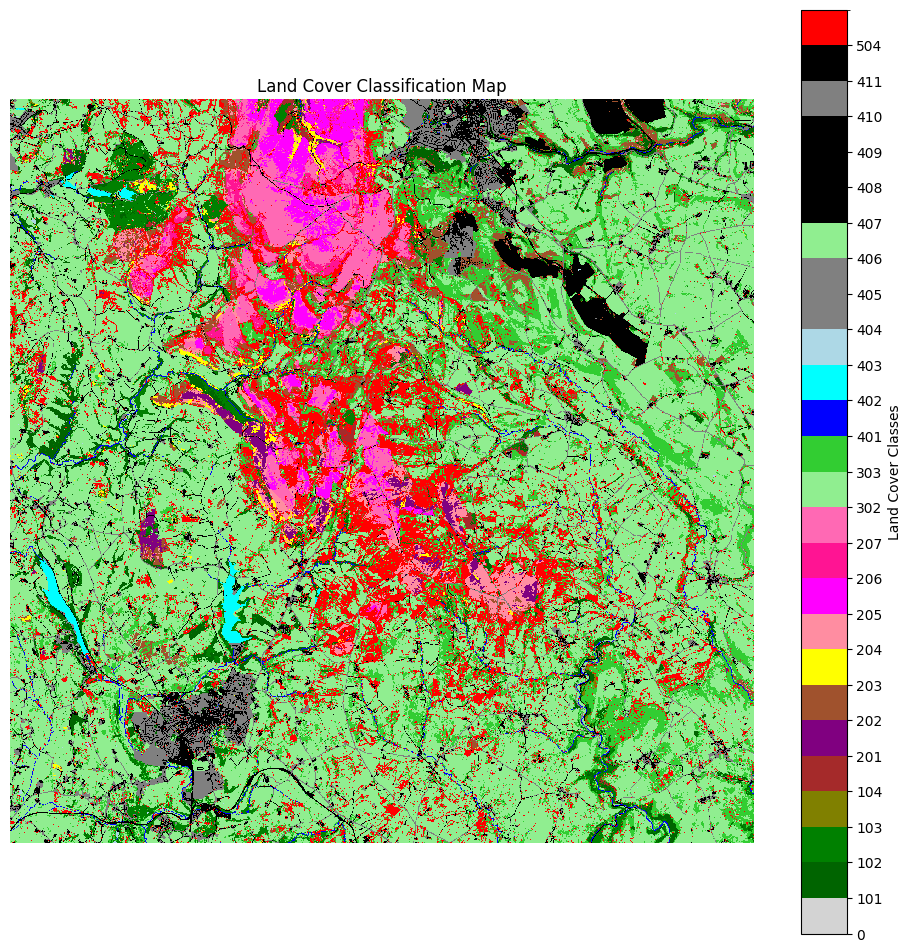

In [10]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

class_colors_combined = {
    0: ('#D3D3D3', 'No Class', '(nan)', 'Band 01'),  # Light grey
    101: ('#006400', 'Broadleaved Woodland', 'C101', 'Band 02'),  # Dark green
    102: ('#008000', 'Coniferous Woodland', 'C102', 'Band 03'),  # Green
    103: ('#808000', 'Scrub', 'C103', 'Band 04'),  # Olive
    104: ('#A52A2A', 'Felled/Young Trees', 'C104', 'Band 05'),  # Brown
    201: ('#800080', 'Heather Moorland', 'D201', 'Band 06'),  # Purple
    202: ('#A0522D', 'Upland Grass Moor', 'D202', 'Band 07'),  # Light brown
    203: ('#FFFF00', 'Bracken', 'D203', 'Band 08'),  # Yellow
    204: ('#FF8DA1', 'Mosaic', 'D204', 'Band 09'),  # Pink
    504: ('#FF0000', 'Rush Pasture', 'E504', 'Band 26'),  # Red
    302: ('#90EE90', 'Improved Grassland', 'E302', 'Band 13'),  # Light green
    303: ('#32CD32', 'Rough Grassland', 'E303', 'Band 14'),  # Lime green
    401: ('#0000FF', 'River', 'OS401', 'Band 15'),  # Blue
    402: ('#00FFFF', 'Lake', 'OS402', 'Band 16'),  # Cyan
    403: ('#ADD8E6', 'Pond', 'OS403', 'Band 17'),  # Light blue
    404: ('#808080', 'Suburban', 'OS404', 'Band 18'),  # Grey
    405: ('#808080', 'Cemeteries', 'OS405', 'Band 19'),  # Grey (same as Suburban)
    406: ('#90EE90', 'Playing Fields', 'OS406', 'Band 20'),  # Light green (same as Improved Grassland)
    407: ('#000000', 'Railway Verges', 'OS407', 'Band 21'),  # Black
    408: ('#000000', 'Railway', 'OS408', 'Band 22'),  # Black
    409: ('#000000', 'Road', 'OS409', 'Band 23'),  # Black
    410: ('#808080', 'Road Verges', 'OS410', 'Band 24'),  # Grey (same as Suburban)
    411: ('#000000', 'Dense Urban', 'OS411', 'Band 25'),  # Black
    205: ('#FF00FF', 'Heather Moorland on blanket bog/deep peat', 'D205', 'Band 10'),  # Magenta
    206: ('#FF1493', 'Upland Grass Moor on blanket bog/deep peat', 'D206', 'Band 11'), # Deep pink
    207: ('#FF69B4', 'Mosaic on blanket bog/deep peat', 'D207', 'Band 12')            # Hot pink
}

# Function to create colormap
def create_colormap(class_colors):
    values = sorted(class_colors.keys())
    colors = [class_colors[v][0] for v in values]
    return ListedColormap(colors), values

# Load the combined raster
combined_raster_path = "../data/mridge_lcm_10m.tif"
with rasterio.open(combined_raster_path) as src:
    raster_data = src.read()  # Read all bands

# Use uint16 for composite raster to handle large values
composite_raster = np.zeros_like(raster_data[0], dtype=np.uint16)

# Map raster bands to classes in the dictionary
for i in range(raster_data.shape[0]):
    band_number = i + 1
    for code, (color, name, label, band) in class_colors_combined.items():
        if f"Band {band_number:02}" == band:
            composite_raster[raster_data[i] > 0] = code

# Generate colormap and normalization values
cmap, norm_values = create_colormap(class_colors_combined)

# Normalize for large class values
norm = BoundaryNorm(norm_values + [max(norm_values) + 1], cmap.N)

# Plot the raster with "nearest" interpolation to avoid artifacts
plt.figure(figsize=(12, 12))
plt.imshow(composite_raster, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(
    ticks=norm_values,
    label="Land Cover Classes",
    orientation="vertical"
)
plt.title("Land Cover Classification Map")
plt.axis('off')
plt.show()

In [ ]:
# Load 
raster_path = "../data/mridge_lcm_10m.tif"
with rasterio.open(raster_path) as src:
    data = src.read()  # Shape: (bands, rows, cols)


nonzero_mask = data > 0

# number of bands > 0 per pixel
nonzero_count = np.sum(nonzero_mask, axis=0)

# Check pixels have >1 land cover assigned
overlaps = np.sum(nonzero_count > 1)
total_pixels = nonzero_count.size

print(f"Pixels with multiple land cover classes: {overlaps}")
print(f"Out of total pixels: {total_pixels}")


Pixels with multiple land cover classes: 1698295
Out of total pixels: 4410000


In [15]:
input_raster = "../data/mridge_lcm_10m.tif"
shapefile = "../data/Land-Cover-Predicted/Generated_Vegetation.shp"
output_raster = "../data/mridge_lcm_habitat_creation_10m.tif"

# shapefile
gdf = gpd.read_file(shapefile)
type_to_band = {"Tree": 1, "Scrub": 3}  # Band index: Band 2 = index 1, Band 4 = index 3
gdf["band_index"] = gdf["type"].map(type_to_band)

# raster
with rasterio.open(input_raster) as src:
    profile = src.profile
    multiband = src.read()
    transform = src.transform
    shape = src.shape

# temporary mask for updates
update_mask = np.zeros(shape, dtype=np.uint8)
band_updates = {}  # Dictionary to hold new band values

for band_index in [1, 3]:  # Bands for Tree (101), Scrub (103)
    band_shapes = gdf[gdf.band_index == band_index]
    if not band_shapes.empty:
        shapes = ((geom, 1) for geom in band_shapes.geometry)
        mask = rasterize(shapes, out_shape=shape, transform=transform, fill=0)
        update_mask = np.logical_or(update_mask, mask)
        band_updates[band_index] = mask

#zero bands as updates
for b in range(multiband.shape[0]):
    multiband[b][update_mask] = 0

# band codes
if 1 in band_updates:
    multiband[1][band_updates[1] == 1] = 1  # Trees → Band 2
if 3 in band_updates:
    multiband[3][band_updates[3] == 1] = 1  # Scrub → Band 4

#  write
profile.update(count=multiband.shape[0], dtype="int32")

with rasterio.open(output_raster, "w", **profile) as dst:
    dst.write(multiband)

print(f"Burned-in raster saved to: {output_raster}")

Burned-in raster saved to: ../data/mridge_lcm_habitat_creation_10m.tif


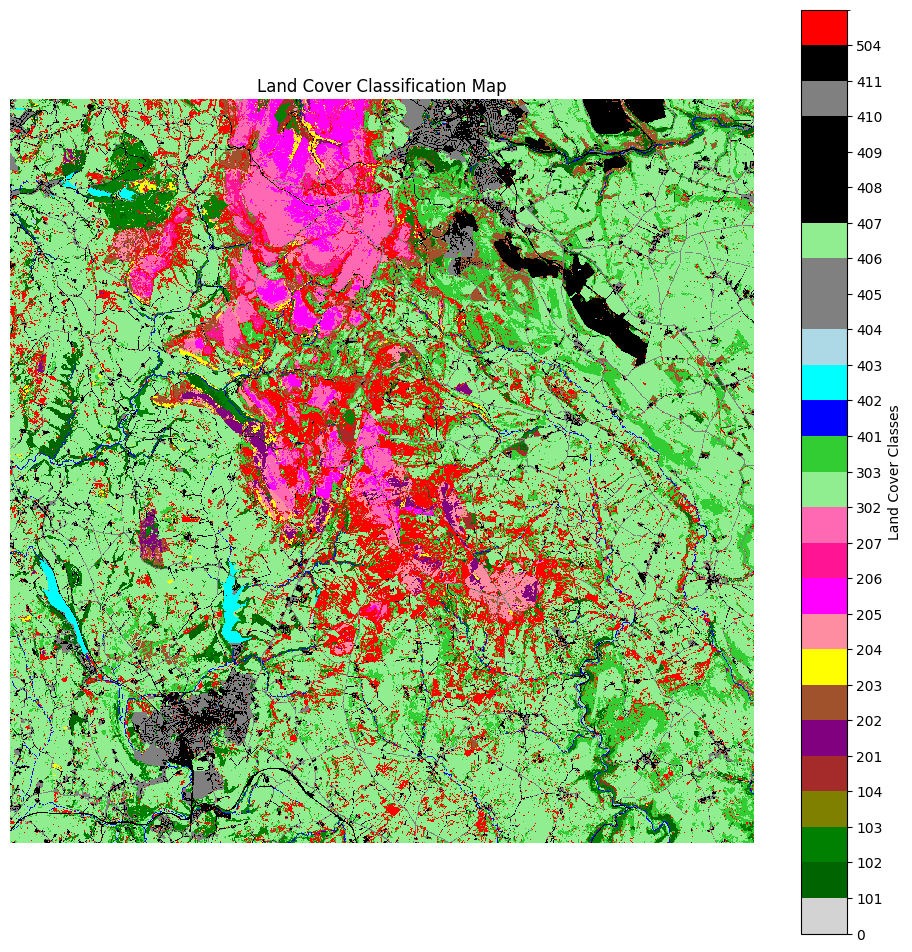

In [16]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

class_colors_combined = {
    0: ('#D3D3D3', 'No Class', '(nan)', 'Band 01'),  # Light grey
    101: ('#006400', 'Broadleaved Woodland', 'C101', 'Band 02'),  # Dark green
    102: ('#008000', 'Coniferous Woodland', 'C102', 'Band 03'),  # Green
    103: ('#808000', 'Scrub', 'C103', 'Band 04'),  # Olive
    104: ('#A52A2A', 'Felled/Young Trees', 'C104', 'Band 05'),  # Brown
    201: ('#800080', 'Heather Moorland', 'D201', 'Band 06'),  # Purple
    202: ('#A0522D', 'Upland Grass Moor', 'D202', 'Band 07'),  # Light brown
    203: ('#FFFF00', 'Bracken', 'D203', 'Band 08'),  # Yellow
    204: ('#FF8DA1', 'Mosaic', 'D204', 'Band 09'),  # Pink
    504: ('#FF0000', 'Rush Pasture', 'E504', 'Band 26'),  # Red
    302: ('#90EE90', 'Improved Grassland', 'E302', 'Band 13'),  # Light green
    303: ('#32CD32', 'Rough Grassland', 'E303', 'Band 14'),  # Lime green
    401: ('#0000FF', 'River', 'OS401', 'Band 15'),  # Blue
    402: ('#00FFFF', 'Lake', 'OS402', 'Band 16'),  # Cyan
    403: ('#ADD8E6', 'Pond', 'OS403', 'Band 17'),  # Light blue
    404: ('#808080', 'Suburban', 'OS404', 'Band 18'),  # Grey
    405: ('#808080', 'Cemeteries', 'OS405', 'Band 19'),  # Grey (same as Suburban)
    406: ('#90EE90', 'Playing Fields', 'OS406', 'Band 20'),  # Light green (same as Improved Grassland)
    407: ('#000000', 'Railway Verges', 'OS407', 'Band 21'),  # Black
    408: ('#000000', 'Railway', 'OS408', 'Band 22'),  # Black
    409: ('#000000', 'Road', 'OS409', 'Band 23'),  # Black
    410: ('#808080', 'Road Verges', 'OS410', 'Band 24'),  # Grey (same as Suburban)
    411: ('#000000', 'Dense Urban', 'OS411', 'Band 25'),  # Black
    205: ('#FF00FF', 'Heather Moorland on blanket bog/deep peat', 'D205', 'Band 10'),  # Magenta
    206: ('#FF1493', 'Upland Grass Moor on blanket bog/deep peat', 'D206', 'Band 11'), # Deep pink
    207: ('#FF69B4', 'Mosaic on blanket bog/deep peat', 'D207', 'Band 12')            # Hot pink
}

# Function to create colormap
def create_colormap(class_colors):
    values = sorted(class_colors.keys())
    colors = [class_colors[v][0] for v in values]
    return ListedColormap(colors), values

# Load the combined raster
combined_raster_path = "../data/mridge_lcm_habitat_creation_10m.tif"
with rasterio.open(combined_raster_path) as src:
    raster_data = src.read()  # Read all bands

# Use uint16 for composite raster to handle large values
composite_raster = np.zeros_like(raster_data[0], dtype=np.uint16)

# Map raster bands to classes in the dictionary
for i in range(raster_data.shape[0]):
    band_number = i + 1
    for code, (color, name, label, band) in class_colors_combined.items():
        if f"Band {band_number:02}" == band:
            composite_raster[raster_data[i] > 0] = code

# Generate colormap and normalization values
cmap, norm_values = create_colormap(class_colors_combined)

# Normalize for large class values
norm = BoundaryNorm(norm_values + [max(norm_values) + 1], cmap.N)

# Plot the raster with "nearest" interpolation to avoid artifacts
plt.figure(figsize=(12, 12))
plt.imshow(composite_raster, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(
    ticks=norm_values,
    label="Land Cover Classes",
    orientation="vertical"
)
plt.title("Land Cover Classification Map")
plt.axis('off')
plt.show()

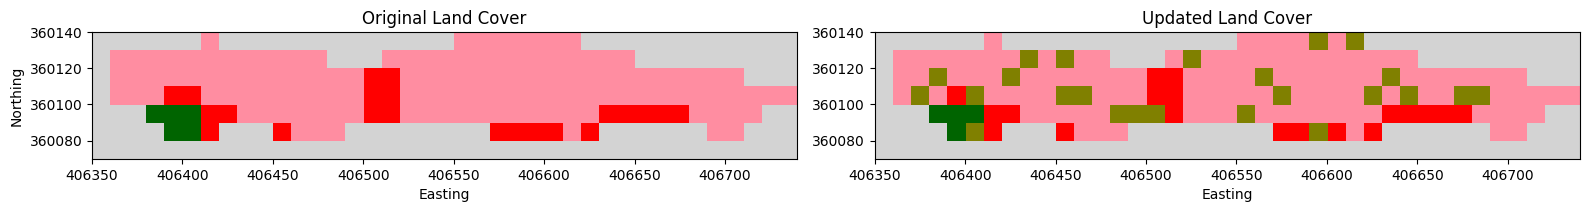

In [ ]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.mask import mask
from rasterio.plot import plotting_extent
from matplotlib.colors import ListedColormap, BoundaryNorm

# === File paths ===
original_raster = "../data/mridge_lcm_10m.tif"
updated_raster = "../data/mridge_lcm_habitat_creation_10m.tif"
mcda_shapefile = "../data/boundaries/MHC_Utopia_Stage_2/MCDA_Polygons.shp"

# === Load one polygon to zoom in on ===
gdf = gpd.read_file(mcda_shapefile)
selected_polygon = gdf.iloc[103].geometry  # Change the index here to view different polygons

# === Land cover class colors ===
class_colors_combined = {
    0: ('#D3D3D3', 'No Class', '(nan)', 'Band 01'),
    101: ('#006400', 'Broadleaved Woodland', 'C101', 'Band 02'),
    102: ('#008000', 'Coniferous Woodland', 'C102', 'Band 03'),
    103: ('#808000', 'Scrub', 'C103', 'Band 04'),
    104: ('#A52A2A', 'Felled/Young Trees', 'C104', 'Band 05'),
    201: ('#800080', 'Heather Moorland', 'D201', 'Band 06'),
    202: ('#A0522D', 'Upland Grass Moor', 'D202', 'Band 07'),
    203: ('#FFFF00', 'Bracken', 'D203', 'Band 08'),
    204: ('#FF8DA1', 'Mosaic', 'D204', 'Band 09'),
    504: ('#FF0000', 'Rush Pasture', 'E504', 'Band 26'),
    302: ('#90EE90', 'Improved Grassland', 'E302', 'Band 13'),
    303: ('#32CD32', 'Rough Grassland', 'E303', 'Band 14'),
    401: ('#0000FF', 'River', 'OS401', 'Band 15'),
    402: ('#00FFFF', 'Lake', 'OS402', 'Band 16'),
    403: ('#ADD8E6', 'Pond', 'OS403', 'Band 17'),
    404: ('#808080', 'Suburban', 'OS404', 'Band 18'),
    405: ('#808080', 'Cemeteries', 'OS405', 'Band 19'),
    406: ('#90EE90', 'Playing Fields', 'OS406', 'Band 20'),
    407: ('#000000', 'Railway Verges', 'OS407', 'Band 21'),
    408: ('#000000', 'Railway', 'OS408', 'Band 22'),
    409: ('#000000', 'Road', 'OS409', 'Band 23'),
    410: ('#808080', 'Road Verges', 'OS410', 'Band 24'),
    411: ('#000000', 'Dense Urban', 'OS411', 'Band 25'),
    205: ('#FF00FF', 'Heather Moorland on blanket bog/deep peat', 'D205', 'Band 10'),
    206: ('#FF1493', 'Upland Grass Moor on blanket bog/deep peat', 'D206', 'Band 11'),
    207: ('#FF69B4', 'Mosaic on blanket bog/deep peat', 'D207', 'Band 12')
}

def create_colormap(class_colors):
    values = sorted(class_colors.keys())
    colors = [class_colors[v][0] for v in values]
    return ListedColormap(colors), values

def classify_masked_raster(raster_path, geometry):
    with rasterio.open(raster_path) as src:
        masked_data, transform = mask(src, [geometry], crop=True)
        classified = np.zeros_like(masked_data[0], dtype=np.uint16)

        for i in range(masked_data.shape[0]):
            band_number = i + 1
            for code, (_, _, _, label) in class_colors_combined.items():
                if f"Band {band_number:02}" == label:
                    classified[masked_data[i] > 0] = code
        return classified, transform


original_classified, transform1 = classify_masked_raster(original_raster, selected_polygon)
updated_classified, transform2 = classify_masked_raster(updated_raster, selected_polygon)


cmap, norm_values = create_colormap(class_colors_combined)
norm = BoundaryNorm(norm_values + [max(norm_values) + 1], cmap.N)


fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(original_classified, cmap=cmap, norm=norm,
              extent=plotting_extent(original_classified, transform1), interpolation='nearest')
axs[0].set_title("Original Land Cover")
axs[0].set_xlabel("Easting")
axs[0].set_ylabel("Northing")

axs[1].imshow(updated_classified, cmap=cmap, norm=norm,
              extent=plotting_extent(updated_classified, transform2), interpolation='nearest')
axs[1].set_title("Updated Land Cover")
axs[1].set_xlabel("Easting")

#cbar = fig.colorbar(axs[1].images[0], ax=axs, orientation="vertical", fraction=0.09, pad=1.06)
#cbar.set_label("Land Cover Code")

plt.tight_layout()
plt.show()
